In [1]:
from sklearn.datasets import fetch_lfw_people

In [2]:
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

C:\Users\hari\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\hari\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


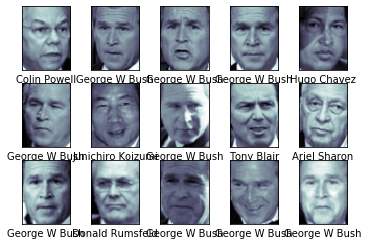

In [6]:
fig,ax = plt.subplots(3,5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap ='bone')
    axi.set(xticks=[],yticks=[],xlabel = faces.target_names[faces.target[i]])

In [7]:
#principal component analysis for extractcing the important features.

In [13]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

pca = PCA(n_components=150,whiten = True,random_state=42)
svc = SVC(kernel='rbf',class_weight='balanced')
model = make_pipeline(pca,svc)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, test_size=0.3, random_state=42)

In [16]:
#Grid search

In [20]:
from sklearn.model_selection import GridSearchCV

param_grid = {'svc__C':[1,5,10,50],
            'svc__gamma':[0.0001,0.0005,0.001,0.005]}
grid = GridSearchCV(model,param_grid)
%time grid.fit(X_train,y_train)
print(grid.best_estimator_)

C:\Users\hari\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Wall time: 16.3 s
Pipeline(memory=None,
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=150,
                     random_state=42, svd_solver='auto', tol=0.0,
                     whiten=True)),
                ('svc',
                 SVC(C=5, cache_size=200, class_weight='balanced', coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=0.001,
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)


In [21]:
print(grid.best_params_)

{'svc__C': 5, 'svc__gamma': 0.001}


In [22]:
#considering the best estimator to predict the test set result.
model = grid.best_estimator_
predictions = model.predict(X_test)

In [23]:
predictions

array([3, 4, 3, 6, 6, 1, 6, 3, 3, 1, 3, 3, 0, 3, 2, 1, 7, 2, 1, 2, 7, 7,
       5, 4, 0, 3, 6, 7, 3, 3, 0, 6, 3, 3, 2, 3, 2, 3, 7, 2, 3, 3, 7, 1,
       3, 3, 0, 2, 1, 2, 7, 3, 3, 6, 7, 3, 7, 1, 7, 0, 4, 2, 7, 2, 5, 4,
       7, 3, 4, 2, 1, 5, 4, 1, 3, 4, 0, 4, 3, 3, 1, 3, 1, 0, 3, 2, 3, 2,
       7, 2, 1, 1, 2, 7, 3, 1, 7, 3, 3, 5, 3, 7, 1, 4, 3, 3, 0, 3, 7, 0,
       3, 1, 0, 2, 3, 1, 3, 2, 7, 4, 1, 7, 5, 2, 3, 1, 3, 3, 1, 2, 3, 7,
       0, 3, 4, 3, 4, 1, 3, 1, 7, 6, 5, 3, 3, 1, 1, 3, 5, 4, 3, 2, 1, 1,
       7, 1, 3, 0, 1, 4, 6, 1, 2, 3, 2, 3, 1, 7, 2, 2, 1, 7, 3, 3, 1, 1,
       1, 3, 3, 1, 0, 4, 1, 1, 7, 1, 1, 5, 3, 7, 3, 3, 7, 5, 6, 7, 3, 7,
       3, 2, 0, 3, 2, 3, 3, 6, 3, 3, 1, 7, 3, 6, 1, 2, 3, 1, 1, 7, 6, 2,
       1, 1, 1, 7, 7, 2, 7, 7, 5, 6, 1, 3, 3, 7, 4, 7, 7, 2, 3, 1, 3, 7,
       4, 1, 4, 3, 1, 1, 5, 1, 2, 3, 4, 1, 1, 1, 2, 2, 3, 7, 3, 7, 3, 7,
       3, 1, 3, 1, 3, 2, 1, 1, 3, 3, 1, 4, 4, 3, 1, 4, 1, 4, 0, 3, 2, 0,
       4, 5, 1, 3, 3, 6, 2, 2, 3, 6, 3, 1, 1, 5, 1,

In [24]:
#visualizing the test result:

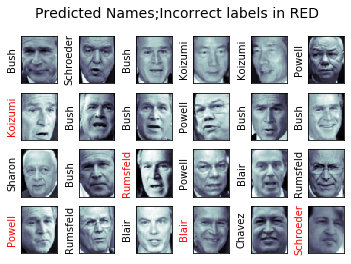

In [30]:
fig,ax = plt.subplots(4,6)
for i,axi in enumerate(ax.flat):
    axi.imshow(X_test[i].reshape(62,47),cmap ='bone')
    axi.set(xticks =[],yticks =[])
    axi.set_ylabel(faces.target_names[predictions[i]].split()[-1],
                  color ='black' if predictions[i] == y_test[i] else 'red')

fig.suptitle('Predicted Names;Incorrect labels in RED',size=14);


In [31]:
#evaluating the models performance

In [38]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [33]:
print(classification_report(y_test,predictions,target_names = faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.68      0.88      0.77        17
     Colin Powell       0.80      0.86      0.83        84
  Donald Rumsfeld       0.67      0.89      0.76        36
    George W Bush       0.91      0.77      0.83       146
Gerhard Schroeder       0.70      0.75      0.72        28
      Hugo Chavez       0.89      0.63      0.74        27
Junichiro Koizumi       0.79      0.94      0.86        16
       Tony Blair       0.72      0.76      0.74        51

         accuracy                           0.80       405
        macro avg       0.77      0.81      0.78       405
     weighted avg       0.81      0.80      0.80       405



In [37]:
print(accuracy_score(y_test,predictions))

0.7975308641975308


In [40]:
mat=confusion_matrix(y_test,predictions)

Text(91.68, 0.5, 'Predicted Label')

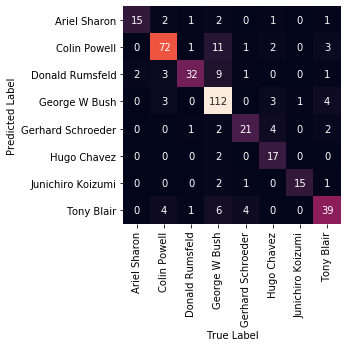

In [42]:
sns.heatmap(mat.T,square=True,annot=True,fmt='d',cbar=False,
           xticklabels=faces.target_names,
           yticklabels=faces.target_names)
plt.xlabel('True Label')
plt.ylabel('Predicted Label')

In [ ]:
#The end.